In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.txt')  


In [13]:
data.head()

,1500,158900
0,1700,169850
1,1750,178950
2,1800,178650
3,1820,180000
4,1920,186850


In [16]:
X = data.iloc[:, 0].values  
Y = data.iloc[:, 1].values.reshape(-1, 1)  

X = np.vstack((np.ones(X.size), X)).T  

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (44, 2)
Y shape: (44, 1)


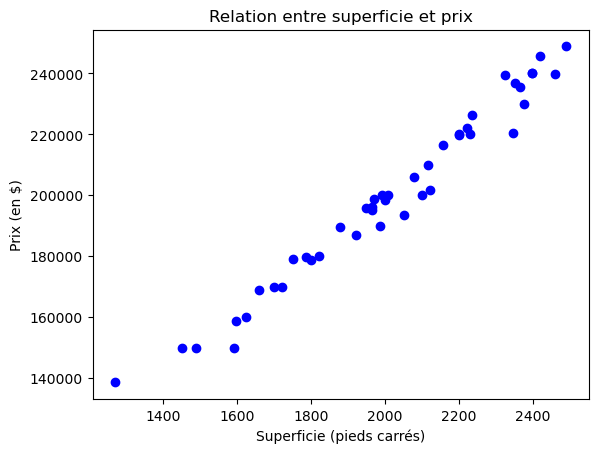

In [21]:
plt.scatter(X[:, 1], Y, color='blue')
plt.xlabel("Superficie (pieds carrés)")
plt.ylabel("Prix (en $)")
plt.title("Relation entre superficie et prix")
plt.show()


In [22]:
def linear_regression(X, Y, learning_rate, iterations):
    m = len(Y) 
    theta = np.zeros((X.shape[1], 1))  
    cost_list = []  
    
    for _ in range(iterations):
        predictions = X @ theta  
        error = predictions - Y
        cost = (1 / (2 * m)) * np.sum(error**2)  
        cost_list.append(cost)
        
        gradient = (1 / m) * (X.T @ error)  
        theta -= learning_rate * gradient  
    
    return theta, cost_list

In [24]:
#un vecteur colonne avec deux éléments : un pour chaque paramètre.
#Forme de 𝜃 (2,1), car il y a deux paramètres à estimer (un pour le biais et un pour la superficie).

In [25]:
iterations = 1000
learning_rate = 0.00000005
theta, cost_list = linear_regression(X, Y, learning_rate, iterations)
print("Paramètres optimaux (theta):", theta)

Paramètres optimaux (theta): [[5.59364693e-02]
 [9.93108104e+01]]


In [26]:
def predict(X, theta):
    return X @ theta

new_X = np.array([[1, 1547], [1, 1896], [1, 1934],[1,2800],[1,3400],[1,5000]])  
for house in new_X :
    print("Our Model Predicts the price of house with",house[1],
         "sq. ft. area as :$",round(np.dot(house,theta)[0],2))


Our Model Predicts the price of house with 1547 sq. ft. area as :$ 153633.88
Our Model Predicts the price of house with 1896 sq. ft. area as :$ 188293.35
Our Model Predicts the price of house with 1934 sq. ft. area as :$ 192067.16
Our Model Predicts the price of house with 2800 sq. ft. area as :$ 278070.33
Our Model Predicts the price of house with 3400 sq. ft. area as :$ 337656.81
Our Model Predicts the price of house with 5000 sq. ft. area as :$ 496554.11


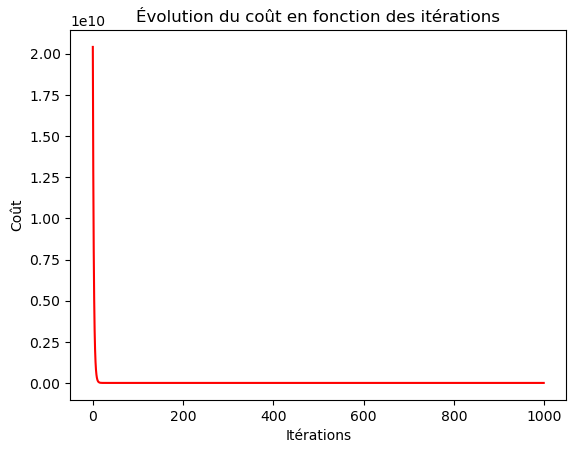

In [27]:
plt.plot(range(iterations), cost_list, color='red')
plt.xlabel("Itérations")
plt.ylabel("Coût")
plt.title("Évolution du coût en fonction des itérations")
plt.show()